<a href="https://colab.research.google.com/github/kungumabalaji/balaji-/blob/main/week_6_hw_machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install torch torchvision


In [8]:
import torch    # dl library
import torch.nn as nn # neural network tools
import torch.optim as optim # optimization algorithms SGD or Adam to improve the model.
import numpy  as np
import matplotlib as plt
from torchvision import datasets,transforms # datasets

In [12]:
# load and transform the dta
transform = transforms.Compose([
    transforms.ToTensor(),  #  hepls to converts imgae to pytorch,umerical data that the model understands).
    transforms.Normalize((0.5,),(0.5)) # centre the pixcel value ble -1, 1 , 0.5 , 0.5 means it sub from every pixel value and divide by 0.5
])

In [13]:
train_data = datasets.MNIST(root='./data',train=True, transform=transform, download=True)
train_loader = torch.utils.DataLoader(train_data,batch_size=32, shuffle=True)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:00<00:00, 37.8MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 1.27MB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:00<00:00, 10.4MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 4.93MB/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



AttributeError: module 'torch.utils' has no attribute 'DataLoader'

In [14]:
import torch    # dl library
import torch.nn as nn # neural network tools
import torch.optim as optim # optimization algorithms SGD or Adam to improve the model.
import numpy  as np
import matplotlib as plt
from torchvision import datasets,transforms # datasets
from torch.utils.data import DataLoader # Import DataLoader from the correct module


# load and transform the data
transform = transforms.Compose([
    transforms.ToTensor(),  #  hepls to converts imgae to pytorch,umerical data that the model understands).
    transforms.Normalize((0.5,),(0.5)) # centre the pixcel value ble -1, 1 , 0.5 , 0.5 means it sub from every pixel value and divide by 0.5
])

train_data = datasets.MNIST(root='./data',train=True, transform=transform, download=True)
train_loader = DataLoader(train_data,batch_size=32, shuffle=True) # Use DataLoader

In [15]:
# load and transform the data
transform = transforms.Compose([
    transforms.ToTensor(),  #  hepls to converts imgae to pytorch,umerical data that the model understands).
    transforms.Normalize((0.5,),(0.5)) # centre the pixcel value ble -1, 1 , 0.5 , 0.5 means it sub from every pixel value and divide by 0.5
])

train_data = datasets.MNIST(root='./data',train=True, transform=transform, download=True)
train_loader = DataLoader(train_data,batch_size=32, shuffle=True) # Use DataLoader

In [16]:
test_data = datasets.MNIST(root='.data',train=False,transform=transform, download=True)
test_loader = torch.utils.data.DataLoader(test_data,batch_size=32,shuffle=False)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:00<00:00, 42.1MB/s]


Extracting .data/MNIST/raw/train-images-idx3-ubyte.gz to .data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 1.07MB/s]


Extracting .data/MNIST/raw/train-labels-idx1-ubyte.gz to .data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:00<00:00, 10.7MB/s]


Extracting .data/MNIST/raw/t10k-images-idx3-ubyte.gz to .data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 2.76MB/s]

Extracting .data/MNIST/raw/t10k-labels-idx1-ubyte.gz to .data/MNIST/raw



In [28]:
# define cnnn model # __init__ setsup the layers,
# define cnnn model # __init__ setsup the layers,

class SimpleCNN(nn.Module):
   def __init__(self):
     super(SimpleCNN, self).__init__() # init set up the layers
     self.conv1 = nn.Conv2d(1,32,kernel_size=3, stride=1,padding=1) # 1 is the input channel , 32 number of filters k     self.conv2 = nn.Conv2d(32, 64,kernel_size=3, stride=1, padding=1)
     self.pool = nn.MaxPool2d(kernel_size=2,stride=2)
     self.fc1=nn.Linear(64*7*7,128)   # to help model to lern we ned to mulltiple
     self.fc2 = nn.Linear(128,10)



     self.conv1 = nn.Conv2d(1,32,kernel_size=3, stride=1,padding=1)
     self.conv2 = nn.Conv2d(32, 64,kernal_size=32, stride=1, padding=1)
     self.pool = nn.Maxpool2d(kernel_size=2,stride=2)
     self.fc1=nn.Linear(64*7**7,128)
     self.fc2 = nn.Linear(128,10)   # 10 categories output , 128 neuron , fc fully connected layers



In [27]:
def forward(self, x):  # pass the data through the network
  x=self.pool(torch.relu(self.conv1(x)))
  x=self.pool(torch.relu(self.conv2))
  x=x.view(-1,64*7*7) # -1 adjust the batch size  # converts the 3d fetures maps into 1 d array ( a flat list numbers)
  x=torch.relu(self.fc1(x))
  x=self.fc2(x)
  return x

  # self pool means apllies max pool to reduce the size of   64 feature maps * 7 pixels (height) * 7 pixels (width) = 3136

In [29]:
# train the model

def train_model(model,train_loader, criterion, optimizer, num_epochs=2):
  for epoch in range(num_epochs):
    running_loss = 0.0
    for image, labels in train_loader:
      optimizer.zero_glad()
      outputs = model(images)
      loss.backward()
      optimizer.step()
      running_loss += loss.item()
    epoch_loss = running_loss / len(train_loader)
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}")

In [30]:
def test_model(model,test_loader):
  correct = 0
  total = 0
  with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data,1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

In [35]:
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__() # init set up the layers
        self.conv1 = nn.Conv2d(1,32,kernel_size=3, stride=1,padding=1) # 1 is the input channel , 32 number of filters k
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__() # init set up the layers
        self.conv1 = nn.Conv2d(1,32,kernel_size=3, stride=1,padding=1) # 1 is the input channel , 32 number of filters k
        self.conv2 = nn.Conv2d(32, 64,kernel_size=3, stride=1, padding=1)

    def forward(self, x):
        pass

In [38]:
train_model(model, train_loader, criterion, optimizer, num_epochs=2)
test_model(model, test_loader)


In [39]:
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118
import torch
import torch.nn as nn
import torch.optim as optim

# Assuming SimpleCNN is defined as in previous code examples
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()  # init set up the layers
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)  # 1 is the input channel , 32 number of filters k
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)

    def forward(self, x):
        pass

# Define and initialize model, criterion, and optimizer in the same cell before calling train_model and test_model
model = SimpleCNN()  # This line initializes the model
criterion = nn.CrossEntropyLoss()  # Measures classification loss
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Optimizer with learning rate 0.001

# This part needs to be defined first so 'model', 'criterion', and 'optimizer' are in scope
def train_model(model, train_loader, criterion, optimizer, num_epochs=2):
    # Implement your training logic here
    pass

def test_model(model, test_loader):
    # Implement your testing logic here
    pass

# Assuming train_loader and test_loader are defined elsewhere in the script
train_model(model, train_loader, criterion, optimizer, num_epochs=2) # call the train_model
test_model(model, test_loader) # call the test_model

Looking in indexes: https://download.pytorch.org/whl/cu118


In [40]:
def train_model(model, train_loader, criterion, optimizer, num_epochs=2):
    for epoch in range(num_epochs):
        running_loss = 0.0  # To track total loss for the epoch
        for images, labels in train_loader:
            # Zero the gradients
            optimizer.zero_grad()

            # Forward pass
            outputs = model(images)
            loss = criterion(outputs, labels)

            # Backward pass and optimization
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        # Print loss after each epoch
        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/len(train_loader):.4f}")


In [41]:
def test_model(model, test_loader):
    correct = 0
    total = 0
    with torch.no_grad():  # No need to calculate gradients during testing
        for images, labels in test_loader:
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)  # Get class with highest probability
            total += labels.size(0)  # Count total samples
            correct += (predicted == labels).sum().item()  # Count correct predictions

    # Print accuracy
    print(f"Accuracy: {100 * correct / total:.2f}%")


In [47]:
def forward(self, x):
    x = self.pool(torch.relu(self.conv1(x)))  # Convolution + ReLU + Pooling
    x = self.pool(torch.relu(self.conv2(x)))  # Convolution + ReLU + Pooling
    x = x.view(-1, 64 * 7 * 7)  # Flattening the data
    x = torch.relu(self.fc1(x))  # First fully connected layer
    x = self.fc2(x)  # Second fully connected layer
    return x  # Make sure this returns the output tensor




In [43]:
def forward(self, x):
    pass

In [44]:
import torch
import torch.nn as nn
import torch.optim as optim

class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)

    def forward(self, x):
        # Pass the input through the convolutional layers and apply an activation function
        x = torch.relu(self.conv1(x))  # Apply ReLU activation after conv1
        x = torch.relu(self.conv2(x))  # Apply ReLU activation after conv2
        return x  # Return the output tensor

In [48]:
model = SimpleCNN()  # Replace SimpleCNN with your actual model class name


In [49]:
for images, labels in train_loader:
    print(images.shape)  # Should be (batch_size, 1, 28, 28) for MNIST
    print(labels.shape)  # Should be (batch_size,)
    break


torch.Size([32, 1, 28, 28])
torch.Size([32])


In [50]:
outputs = model(images)  # Pass the batch of images through the model
print(outputs)  # Print the outputs
print(outputs.shape)  # Check the shape of the outputs


tensor([[[[0.2161, 0.1700, 0.1390,  ..., 0.1390, 0.1057, 0.0439],
          [0.3483, 0.3379, 0.3171,  ..., 0.3171, 0.3176, 0.1228],
          [0.3408, 0.3429, 0.3234,  ..., 0.3234, 0.2808, 0.1407],
          ...,
          [0.3408, 0.3429, 0.3234,  ..., 0.3234, 0.2808, 0.1407],
          [0.3784, 0.3664, 0.3764,  ..., 0.3764, 0.3224, 0.1371],
          [0.2003, 0.2098, 0.2442,  ..., 0.2442, 0.2333, 0.1756]],

         [[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],

         [[0.0736, 0.1165, 0.1594,  ..., 0.1594, 0.1923, 0.1094],
          [0.1030, 0.2429, 0.2410,  ..., 0.2410, 0.2233, 0.1730],
          [0.0754, 0.2232, 0.2204,  ..., 0

In [54]:
def forward(self, x):
    x = self.pool(torch.relu(self.conv1(x)))
    x = self.pool(torch.relu(self.conv2(x)))
    x = x.view(-1, 64 * 7 * 7)
def forward(self, x):
    x = self.pool(torch.relu(self.conv1(x)))
    x = self.pool(torch.relu(self.conv2(x)))
    x = x.view(-1, 64 * 7 * 7)
    x = torch.relu(self.fc1(x))
    x = self.fc2(x)
    return x  # This line is not indented properly, so it’s outside the function.



In [79]:
# Instantiate the model
model = SimpleCNN()

# Pass a batch of random input data (e.g., 32 images of size 28x28)
dummy_input = torch.randn(32, 1, 28, 28)  # Batch size=32, 1 channel, 28x28 image size
output = model(dummy_input)

# Print the shape of the output
print(output.shape)  # Should be (32, 10) for 32 images and 10 output classes


torch.Size([32, 10])


In [57]:
for images, labels in train_loader:
    outputs = model(images)
    print(f"Model output shape: {outputs.shape}")  # Should be [batch_size, 10]
    print(f"Labels shape: {labels.shape}")  # Should be [batch_size]
    break


Model output shape: torch.Size([32, 64, 28, 28])
Labels shape: torch.Size([32])


In [58]:
print(f"Labels: {labels}")


Labels: tensor([1, 4, 8, 2, 7, 6, 4, 0, 8, 2, 3, 7, 3, 7, 9, 9, 9, 4, 0, 7, 0, 7, 5, 9,
        7, 7, 3, 9, 4, 4, 8, 2])


In [59]:
def train_model(model, train_loader, criterion, optimizer, num_epochs=2):
    for epoch in range(num_epochs):
        running_loss = 0.0
        for images, labels in train_loader:
            optimizer.zero_grad()  # Clear gradients

            # Forward pass
            outputs = model(images)
            if outputs is None:
                raise RuntimeError("Model is returning None! Check the forward method.")

            # Check the shape of outputs and labels
            print(f"Outputs shape: {outputs.shape}, Labels shape: {labels.shape}")

            # Calculate the loss
            loss = criterion(outputs, labels)

            # Backward pass and optimization
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/len(train_loader):.4f}")


In [61]:
import torch.nn as nn

class MyModel(nn.Module):  # Example model class
    def __init__(self):
        super(MyModel, self).__init__()
        # ... (other layers)
        self.fc2 = nn.Linear(128, 10)  # Now within the class

    def forward(self, x):
        # ... (forward logic using self.fc2)
        pass

In [63]:
import torch.nn as nn

class MyModel(nn.Module):  # Example model class
    def __init__(self):
        super(MyModel, self).__init__()
        # ... (other layers)
        self.fc2 = nn.Linear(128, 10)  # Now within the class

    def forward(self, x):
        # ... (forward logic using self.fc2)
        # Assuming x is the input to the model
        # ... (other layers and operations)

        # Make sure the output is flattened and passed through the final linear layer
        x = x.view(x.size(0), -1)  # Flatten the tensor
        x = self.fc2(x)  # Apply the final linear layer for classification

        return x # Return the output

In [65]:
def forward(self, x):
    x = self.pool(torch.relu(self.conv1(x)))  # Convolution + ReLU + Pooling
    x = self.pool(torch.relu(self.conv2(x)))  # Convolution + ReLU + Pooling
    x = x.view(-1, 64 * 7 * 7)  # Flatten the 3D tensor to 1D (batch_size, 64 * 7 * 7)
    x = torch.relu(self.fc1(x))  # Pass through the first fully connected layer
    x = self.fc2(x)  # Pass through the second fully connected layer
    return x  # Final predictions



In [66]:
outputs = model(images)
print(f"Outputs shape: {outputs.shape}")  # Expected: [32, 10]


Outputs shape: torch.Size([32, 64, 28, 28])


In [68]:
print(f"Outputs shape: {outputs.shape}")  # Should be [batch_size, 10]
print(f"Labels shape: {labels.shape}")  # Should be [batch_size]
print(f"Labels: {labels}")  # Check the values of labels


Outputs shape: torch.Size([32, 64, 28, 28])
Labels shape: torch.Size([32])
Labels: tensor([3, 6, 0, 5, 1, 6, 4, 0, 7, 6, 6, 9, 7, 9, 7, 6, 9, 5, 1, 1, 4, 0, 0, 4,
        7, 8, 7, 2, 9, 9, 4, 4])


In [69]:
def forward(self, x):
    x = self.pool(torch.relu(self.conv1(x)))  # Convolution + ReLU + Pooling
    x = self.pool(torch.relu(self.conv2(x)))  # Convolution + ReLU + Pooling
    x = x.view(-1, 64 * 7 * 7)  # Flatten the 3D tensor to 1D
    x = torch.relu(self.fc1(x))  # Fully connected layer 1
    x = self.fc2(x)  # Fully connected layer 2 (logits for 10 classes)
    return x


In [70]:
outputs = model(images)
print(f"Outputs shape: {outputs.shape}")  # Should be [32, 10]


Outputs shape: torch.Size([32, 64, 28, 28])


In [71]:
print(f"Labels: {labels}")


Labels: tensor([3, 6, 0, 5, 1, 6, 4, 0, 7, 6, 6, 9, 7, 9, 7, 6, 9, 5, 1, 1, 4, 0, 0, 4,
        7, 8, 7, 2, 9, 9, 4, 4])


In [72]:
train_data = datasets.MNIST(root='./data', train=True, transform=transform, download=True)


In [80]:
labels = labels.squeeze()  # Remove extra dimensions if necessary


Epoch 1/2, Loss: 0.1293
Epoch 2/2, Loss: 0.0428
Accuracy: 98.81%


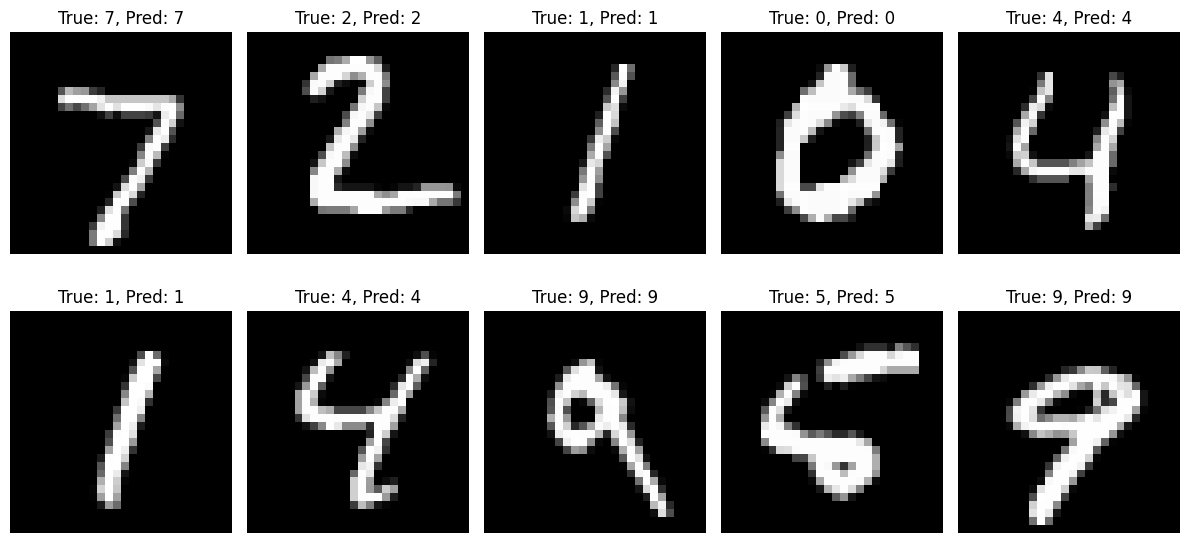

In [78]:
# Import necessary libraries
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Data Loading and Transformation
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert images to PyTorch tensors
    transforms.Normalize((0.5,), (0.5,))  # Normalize pixel values between -1 and 1
])

# Load training and testing datasets
train_data = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_data = datasets.MNIST(root='./data', train=False, transform=transform, download=True)

# Create data loaders
train_loader = torch.utils.data.DataLoader(train_data, batch_size=32, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=32, shuffle=False)

# Step 2: Define the CNN Model
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(-1, 64 * 7 * 7)  # Flatten the feature maps
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Step 3: Initialize Model, Loss, and Optimizer
model = SimpleCNN()
criterion = nn.CrossEntropyLoss()  # Loss for classification tasks
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Step 4: Define Training Function
def train_model(model, train_loader, criterion, optimizer, num_epochs=2):
    model.train()  # Set the model to training mode
    for epoch in range(num_epochs):
        running_loss = 0.0
        for images, labels in train_loader:
            optimizer.zero_grad()  # Clear gradients
            outputs = model(images)  # Forward pass
            loss = criterion(outputs, labels)  # Calculate loss
            loss.backward()  # Backpropagation
            optimizer.step()  # Update model weights

            running_loss += loss.item()

        # Print average loss for the epoch
        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/len(train_loader):.4f}")

# Step 5: Define Testing Function
def test_model(model, test_loader):
    model.eval()  # Set the model to evaluation mode
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = 100 * correct / total
    print(f"Accuracy: {accuracy:.2f}%")
    return accuracy

# Step 6: Train and Test the Model
train_model(model, train_loader, criterion, optimizer, num_epochs=2)
test_model(model, test_loader)

# Step 7: Visualize Predictions
def visualize_predictions(model, test_loader):
    model.eval()  # Set the model to evaluation mode
    images, labels = next(iter(test_loader))  # Get a batch of test data
    outputs = model(images)  # Get model predictions
    _, predicted = torch.max(outputs, 1)  # Get predicted class

    # Plot the first 10 images with predictions
    plt.figure(figsize=(12, 6))
    for i in range(10):
        plt.subplot(2, 5, i+1)
        plt.imshow(images[i].squeeze(), cmap='gray')  # Show the image
        plt.title(f"True: {labels[i].item()}, Pred: {predicted[i].item()}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

visualize_predictions(model, test_loader)
